## Using Decision tree

In [22]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [23]:
#Loading the cleaned dataset
df = pd.read_csv("data/stellar_eda.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237649e+18,194.748212,-0.911226,25.77469,22.72579,20.84263,19.80384,19.29726,756,301,1,527,4.271919e+18,GALAXY,0.525770,3794,55241,926
1,1.237661e+18,140.525977,35.614836,21.94718,21.31617,20.21319,19.45814,19.09832,3560,301,4,221,5.228710e+18,GALAXY,0.439029,4644,55922,111
2,1.237658e+18,125.922894,38.044046,23.47268,21.34390,19.41544,18.67742,18.14655,2822,301,2,135,4.233595e+18,GALAXY,0.414493,3760,55268,770
3,1.237664e+18,18.634831,0.468756,20.03793,18.13051,17.21534,16.80004,16.48915,4263,301,5,240,1.217236e+18,GALAXY,0.091736,1081,52531,503
4,1.237666e+18,52.832458,1.215699,20.72916,20.34843,20.11169,19.75053,19.74247,4849,301,6,807,8.028670e+17,QSO,1.562706,713,52178,365


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       79999 non-null  float64
 1   alpha        79999 non-null  float64
 2   delta        79999 non-null  float64
 3   u            79999 non-null  float64
 4   g            79999 non-null  float64
 5   r            79999 non-null  float64
 6   i            79999 non-null  float64
 7   z            79999 non-null  float64
 8   run_ID       79999 non-null  int64  
 9   rerun_ID     79999 non-null  int64  
 10  cam_col      79999 non-null  int64  
 11  field_ID     79999 non-null  int64  
 12  spec_obj_ID  79999 non-null  float64
 13  class        79999 non-null  object 
 14  redshift     79999 non-null  float64
 15  plate        79999 non-null  int64  
 16  MJD          79999 non-null  int64  
 17  fiber_ID     79999 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

In [25]:
df['fiber_ID'] = df['fiber_ID'].astype(str)
df['spec_obj_ID'] = df['spec_obj_ID'].astype(str)
df['field_ID'] = df['field_ID'].astype(str)
df['rerun_ID'] = df['rerun_ID'].astype(str)
df['run_ID'] = df['run_ID'].astype(str)
df['obj_ID'] = df['obj_ID'].astype(str)
df['plate'] = df['plate'].astype(str)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       79999 non-null  object 
 1   alpha        79999 non-null  float64
 2   delta        79999 non-null  float64
 3   u            79999 non-null  float64
 4   g            79999 non-null  float64
 5   r            79999 non-null  float64
 6   i            79999 non-null  float64
 7   z            79999 non-null  float64
 8   run_ID       79999 non-null  object 
 9   rerun_ID     79999 non-null  object 
 10  cam_col      79999 non-null  int64  
 11  field_ID     79999 non-null  object 
 12  spec_obj_ID  79999 non-null  object 
 13  class        79999 non-null  object 
 14  redshift     79999 non-null  float64
 15  plate        79999 non-null  object 
 16  MJD          79999 non-null  int64  
 17  fiber_ID     79999 non-null  object 
dtypes: float64(8), int64(2), object(8)
memory usag

### Preparing the ML Model

In [27]:
#List of all numarical columns that are going to be used in our modelling process
column_list = ['u','g','r','i','z','redshift', 'alpha', 'delta', 'MJD']


In [28]:
#defning the input and the output
x = df[column_list]
y = df["class"]

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123) # 70% training and 30% test

In [30]:
# Numarical Inputs Standardization
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [31]:
# Create Decision Tree classifer object, wihtout specifying the hyperparameters
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9673333333333334


In [ ]:
#Decision tree visualization before tuning
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,feature_names = column_list,class_names=['i','redshift', 'alpha', 'delta', 'MJD'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('Stellar.png')

Image(graph.create_png())

### Tuning

In [34]:
#cross validation
hyper = {'criterion' : ['gini', 'entropy'],'max_leaf_nodes': list(range(2,80)), 'min_samples_split':[2,3,4,5]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=123), hyper, verbose=1,cv=3)

grid_search_cv.fit(X_train,y_train)
max_nodes = grid_search_cv.best_estimator_.get_params()['max_leaf_nodes']

Fitting 3 folds for each of 624 candidates, totalling 1872 fits


In [35]:
# Best Hyperparameters
grid_search_cv.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=70, random_state=123)

In [36]:
#cross validation
hyper = {'criterion' : ['gini', 'entropy'],'max_depth': list(range(1,50)), 'min_samples_split':[2,3,4, 5]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=123, max_leaf_nodes =max_nodes), hyper, verbose=1,cv=3)

grid_search_cv.fit(X_train,y_train)
depth = grid_search_cv.best_estimator_.get_params()['max_depth']

Fitting 3 folds for each of 392 candidates, totalling 1176 fits


In [37]:
grid_search_cv.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=70,
                       random_state=123)

### ML Prediction & ML Evaluation

In [38]:
#training the model with the hyperparameters from the tuning part
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=123, max_leaf_nodes =max_nodes, max_depth = depth)
clf1 = clf1.fit(X_train,y_train)

In [39]:
#predict the class
y_pred = clf1.predict(X_test)

In [44]:
#Accuracy calculation, y_test y_pred
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9741666666666666


In [ ]:
#Decision tree visualization after tuning
dot_data = StringIO()

export_graphviz(clf1, out_file=dot_data,
               filled=True, rounded=True,feature_names = column_list,class_names=['STAR', 'GALAXY', 'QSO'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('Stellar_after_tuning.png')

Image(graph.create_png())

In [40]:
#Confusion Matrix of the X_train y_train
predictions = clf1.predict(X_train)
cm0 = confusion_matrix(y_train, predictions)
cm0

array([[32804,   401,    48],
       [  760,  9864,     3],
       [   25,     0, 12094]])

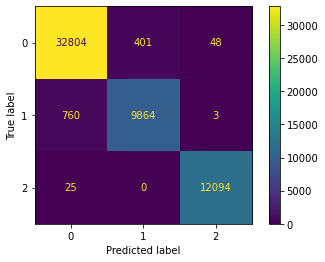

In [41]:
#Confusion Matrix of the X_train y_train Visualized
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm0,
  )
  
disp.plot()

In [42]:
#Confusion Matrix of the X_test y_test
predictions = clf1.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm

array([[14051,   230,    22],
       [  358,  4184,     0],
       [   10,     0,  5145]])

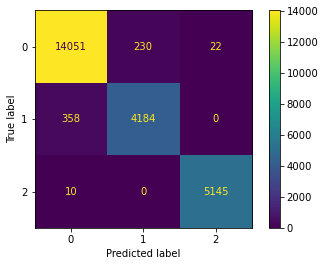

In [43]:
#Confusion Matrix of the X_test y_test Visualized
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  )
  
disp.plot()

In [45]:
# print the scores on training and test set

print('Training set score:' , clf1.score(X_train, y_train))

print('Test set score:', clf1.score(X_test, y_test))

Training set score: 0.9779103198271397
Test set score: 0.9741666666666666


In [49]:
from sklearn.metrics import f1_score
sklearn.metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)

0.9740445302982753

In [46]:
print(metrics.classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     14303
         QSO       0.95      0.92      0.93      4542
        STAR       1.00      1.00      1.00      5155

    accuracy                           0.97     24000
   macro avg       0.97      0.97      0.97     24000
weighted avg       0.97      0.97      0.97     24000



In [59]:
#feature importance table
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(clf1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True)
importances

,feature,importance
7,delta,0.000
6,alpha,0.001
8,MJD,0.001
2,r,0.002
3,i,0.003
4,z,0.012
0,u,0.019
1,g,0.047
5,redshift,0.915


Text(0.5, 1.0, 'class Vs MJD for Galaxy')

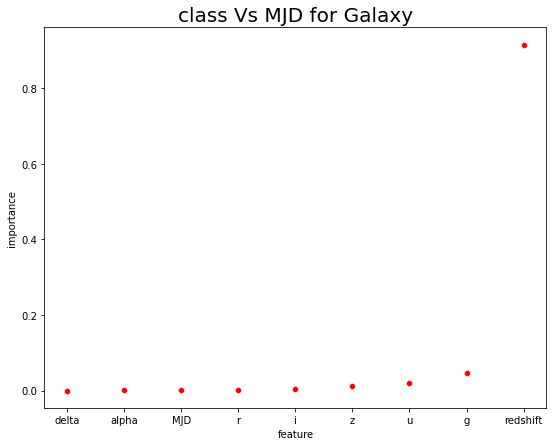

In [60]:
#feature importance visualized
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
sns.scatterplot(x='feature',y='importance',data=importances,color='r')
plt.title("class Vs MJD for Galaxy",{'fontsize':20})